# How passing of time impacts datasets

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import pandas as pd

# plot style
sns.set_style('whitegrid')
sns.set_style({'font.family': 'Times New Roman'})

In [2]:
metadata = pd.read_csv("data/metadata_merged.csv", index_col=0)

In [7]:
df = pd.read_csv("data/dataset_level.csv")

In [8]:
df.head()

,Unnamed: 0,doi,list_of_all,comments_no,dependen_no,list_of_libs,total_size,sizeMB,files_count,docs,...,wflow_lib,dockerfile,space,other_code,rmd,rproj,rnw,comments_no_files,avg_file_len,unique_libs_no
0,0,doi:10.7910/DVN/XFQZI2,FigureA2data.dta;Readme.rtf;Condemnation.dta;C...,71,10,rms;xtable;readstata13;Matching;foreign,411332,0.41,7,1,...,0,0,0,1,0,0,0,10.142857,10.43,5
1,1,doi:10.7910/DVN/WGPDBS,campaign_effects_replication.do;replication_da...,17,1,ggplot2,12105318,12.11,3,0,...,0,0,0,1,0,0,0,5.666667,28.00,1
2,2,doi:10.7910/DVN/BPON3K,fig_10_effect_of_winning_on_gov.R;tab_8_campai...,194,111,ggplot2;lm_2008;lm_2004;character.only=TRUE;li...,2959665,2.96,34,1,...,0,0,0,0,0,0,0,5.705882,24.03,22
3,3,doi:10.7910/DVN/ZWAGXZ,sponsorship_1_v3_November+6%2C+2017_12.32.csv;...,168,21,sylcount;sandwich;tidyverse;RCurl;acs;RJSONIO;...,5350420,5.35,13,1,...,0,0,1,0,0,0,0,12.923077,28.62,9
4,4,doi:10.7910/DVN/JXXNDO,wgi_CoC_2013.csv;DB14-Distance-to-Frontier-dat...,140,0,NaN,1402185,1.40,11,1,...,0,0,0,0,0,0,0,12.727273,12.73,0


In [12]:
merged = pd.merge(df,metadata[['doi','publicationDate']],on='doi')

In [13]:
merged.head()

,Unnamed: 0,doi,list_of_all,comments_no,dependen_no,list_of_libs,total_size,sizeMB,files_count,docs,...,dockerfile,space,other_code,rmd,rproj,rnw,comments_no_files,avg_file_len,unique_libs_no,publicationDate
0,2,doi:10.7910/DVN/BPON3K,fig_10_effect_of_winning_on_gov.R;tab_8_campai...,194,111,ggplot2;lm_2008;lm_2004;character.only=TRUE;li...,2959665,2.96,34,1,...,0,0,0,0,0,0,5.705882,24.03,22,2017
1,4,doi:10.7910/DVN/JXXNDO,wgi_CoC_2013.csv;DB14-Distance-to-Frontier-dat...,140,0,NaN,1402185,1.40,11,1,...,0,0,0,0,0,0,12.727273,12.73,0,2019
2,5,doi:10.7910/DVN/NVRBC9,Lueders_et al_2017_driverslicenses_replication...,225,20,mapproj;maptools;dplyr;rgdal;ggrepel;ggalt;alb...,451339,0.45,3,0,...,0,1,0,0,0,0,75.000000,37.67,19,2017
3,6,doi:10.7910/DVN/FXKA3J,Tweet.R,2,0,NaN,1669,0.00,1,0,...,0,0,0,0,0,0,2.000000,5.00,0,2016
4,7,doi:10.7910/DVN/WCTILJ,Script.R;Dataset.tab,21,4,readxl;plspm,28411,0.03,2,0,...,0,0,0,0,0,0,10.500000,6.50,2,2020


In [14]:
merged.groupby('publicationDate').mean()

,Unnamed: 0,comments_no,dependen_no,total_size,sizeMB,files_count,docs,r_file,test,test_lib,...,wflow_lib,dockerfile,space,other_code,rmd,rproj,rnw,comments_no_files,avg_file_len,unique_libs_no
publicationDate,,,,,,,,,,,,,,,,,,,,,
2010,1211.000000,14.000000,1.000000,1.393400e+04,0.010000,2.000000,0.000000,1.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,8.000000,1.000000
2014,1813.500000,249.500000,9.000000,4.924366e+06,4.925000,7.000000,0.500000,4.500000,0.000000,0.0,...,0.0,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,35.791667,19.230000,3.500000
2015,1062.670455,184.659091,14.454545,1.050298e+08,105.030114,13.852273,0.545455,4.193182,0.056818,0.0,...,0.0,0.000000,0.397727,0.284091,0.011364,0.000000,0.022727,23.070646,17.404545,6.022727
2016,1055.540441,207.297794,13.000000,9.147157e+07,91.471654,19.386029,0.573529,3.797794,0.025735,0.0,...,0.0,0.000000,0.345588,0.382353,0.018382,0.007353,0.007353,19.833321,17.494779,6.676471
2017,1009.588957,229.935583,16.733129,9.834318e+07,98.343098,18.598160,0.564417,4.395706,0.058282,0.0,...,0.0,0.000000,0.322086,0.297546,0.021472,0.000000,0.003067,25.344336,17.726840,6.662577
2018,1062.564854,198.460251,16.351464,7.109928e+07,71.099351,14.238494,0.571130,3.317992,0.043933,0.0,...,0.0,0.000000,0.330544,0.341004,0.020921,0.006276,0.000000,22.967414,17.784268,7.658996
2019,1039.395480,283.659134,16.764595,1.105798e+08,110.580019,18.216573,0.591337,3.798493,0.073446,0.0,...,0.0,0.001883,0.288136,0.306968,0.048964,0.011299,0.000000,29.330026,16.833465,8.438795
2020,1069.451327,259.938053,21.557522,6.942743e+07,69.427345,17.672566,0.584071,4.000000,0.044248,0.0,...,0.0,0.026549,0.314159,0.274336,0.039823,0.017699,0.000000,26.169279,17.410752,8.384956


In [31]:
merged = merged[merged.publicationDate >= 2015]

In [62]:
merged.columns

Index([u'Unnamed: 0', u'doi', u'list_of_all', u'comments_no', u'dependen_no',
       u'list_of_libs', u'total_size', u'sizeMB', u'files_count', u'docs',
       u'r_file', u'test', u'test_lib', u'prov', u'wflow_lib', u'dockerfile',
       u'space', u'other_code', u'rmd', u'rproj', u'rnw', u'comments_no_files',
       u'avg_file_len', u'unique_libs_no', u'publicationDate'],
      dtype='object')

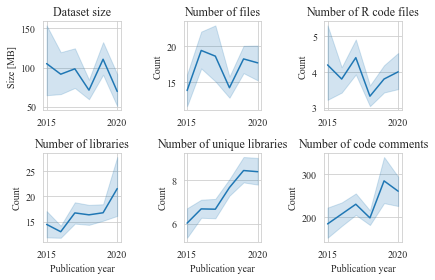

In [66]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(6, 4))

ci_=80
y_ = ["sizeMB", "files_count", "r_file"]
y_y = ["Size [MB]", "Count", "Count"]
y_title = ["Dataset size", "Number of files", "Number of R code files"]
for i in range(0,3):
    temp = sns.lineplot(data=merged, x="publicationDate", y=y_[i], ci=ci_, ax=axes[0,i])
    temp.set_xlabel("")
    temp.set_ylabel(y_y[i])
    temp.set_title(y_title[i])

y_ = ["dependen_no", "unique_libs_no", "comments_no"]
y_y = ["Count", "Count", "Count"]
y_title = ["Number of libraries", "Number of unique libraries", "Number of code comments"]
for i in range(0,3):
    temp = sns.lineplot(data=merged, x="publicationDate", y=y_[i], ci=ci_, ax=axes[1,i])
    temp.set_xlabel("Publication year")
    temp.set_ylabel(y_y[i])
    temp.set_title(y_title[i])

fig.tight_layout()